# Requirements
- Elephant>=0.4.1 (https://github.com/NeuralEnsemble/elephant)
- neo>=0.4.0 (https://github.com/NeuralEnsemble/python-neo)  
- quantities>=0.9.0
- numpy>=1.6.2
- matplotlib>=1.5.1


# Installation
### On Ubuntu/Debian:
- sudo apt-get install python-numpy python-matplotlib python-pip ipython
- pip install quantities
- pip install elephant

In [1]:
import numpy
import quantities as pq
import elephant.unitary_event_analysis as ue
import neo
import matplotlib.pyplot as plt
import sys
sys.path.append('../code/')
from utils import *
%matplotlib inline

In [2]:
# parameters for unitary events analysis
winsize = 100*pq.ms
binsize = 5*pq.ms
winstep = 5*pq.ms
pattern_hash = [3]
method = 'analytic_TrialAverage'
significance_level = 0.05
data_path = '../data/'

## Figure 1 (alignment of the trials on the PS)
- This is the first attempt to reproduce Figure 2 of the original article after cutting the data with the trial alignment on the PS. 

('trigger: ', 'PS_4')
plotting raster plot ...
plotting Spike Rates ...
plotting Raw Coincidences ...
plotting emp. and exp. coincidences rate ...
plotting Surprise ...
plotting UEs ...


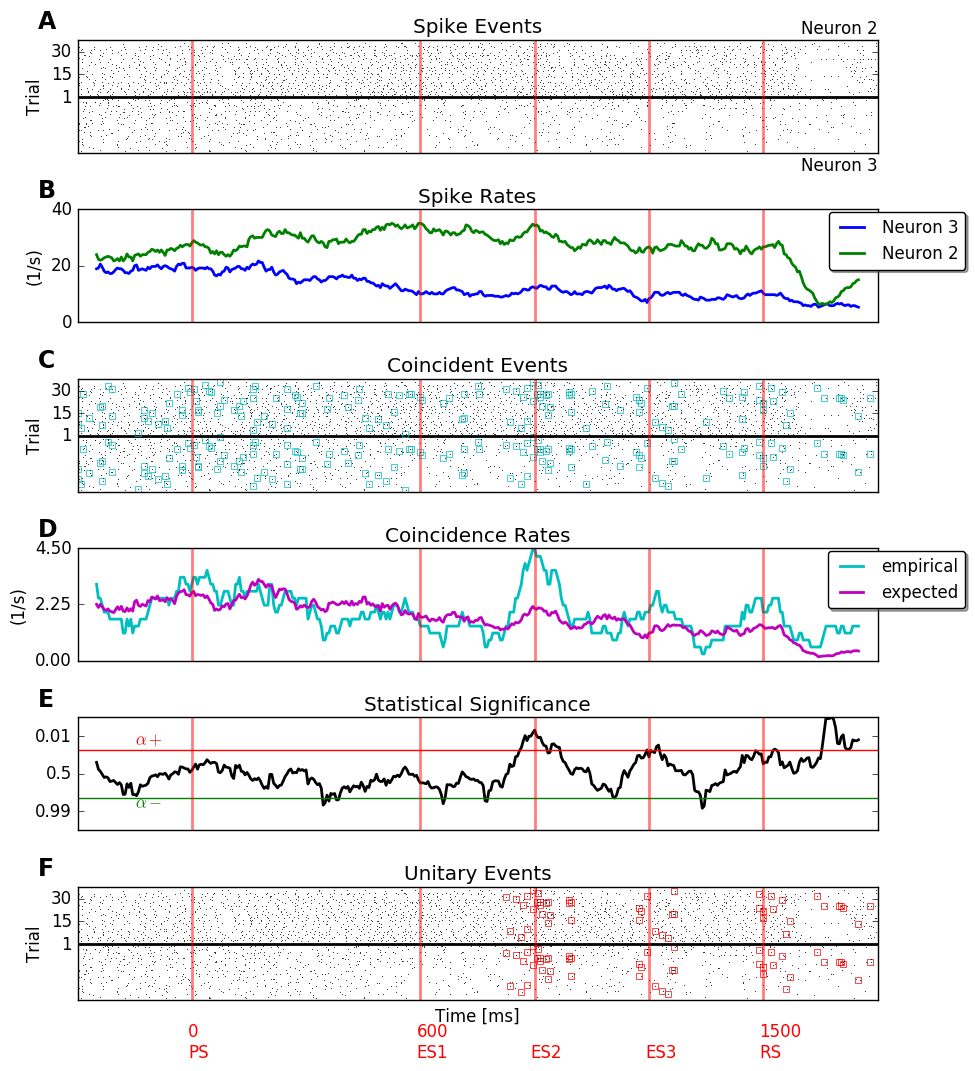

In [3]:
# load and cut the data
file_name = 'winny131_23.gdf'

trigger = 'PS_4'
t_pre = 300*pq.ms
t_post = 1800*pq.ms
spiketrain = load_gdf2Neo(data_path+file_name,trigger, t_pre,t_post)
N = len(spiketrain.T)

# calculating UE ...
UE = ue.jointJ_window_analysis(
    spiketrain, binsize, winsize, winstep, pattern_hash,method = method)

# parameters for plotting
plot_params = {
    'events':{'0\nPS':[300*pq.ms],'600\nES1':[900*pq.ms],'ES2':[1200*pq.ms],
                     'ES3':[1500*pq.ms],'1500\nRS': [1800*pq.ms]},                                                                                                                                 
    'path_filename_format':'../article/figure1.eps',
    }

print('trigger: ', trigger)
plot_figure1_2(spiketrain,UE,significance_level,binsize,winsize,winstep, pattern_hash,N,plot_params)


## Figure 2 (alignment of the trials on the RS)
-  This is the reproduction of Figure 2 of  the original article after cutting the data with the trial alignment on RS. 

('trigger: ', 'RS_4')
plotting raster plot ...
plotting Spike Rates ...
plotting Raw Coincidences ...
plotting emp. and exp. coincidences rate ...
plotting Surprise ...
plotting UEs ...


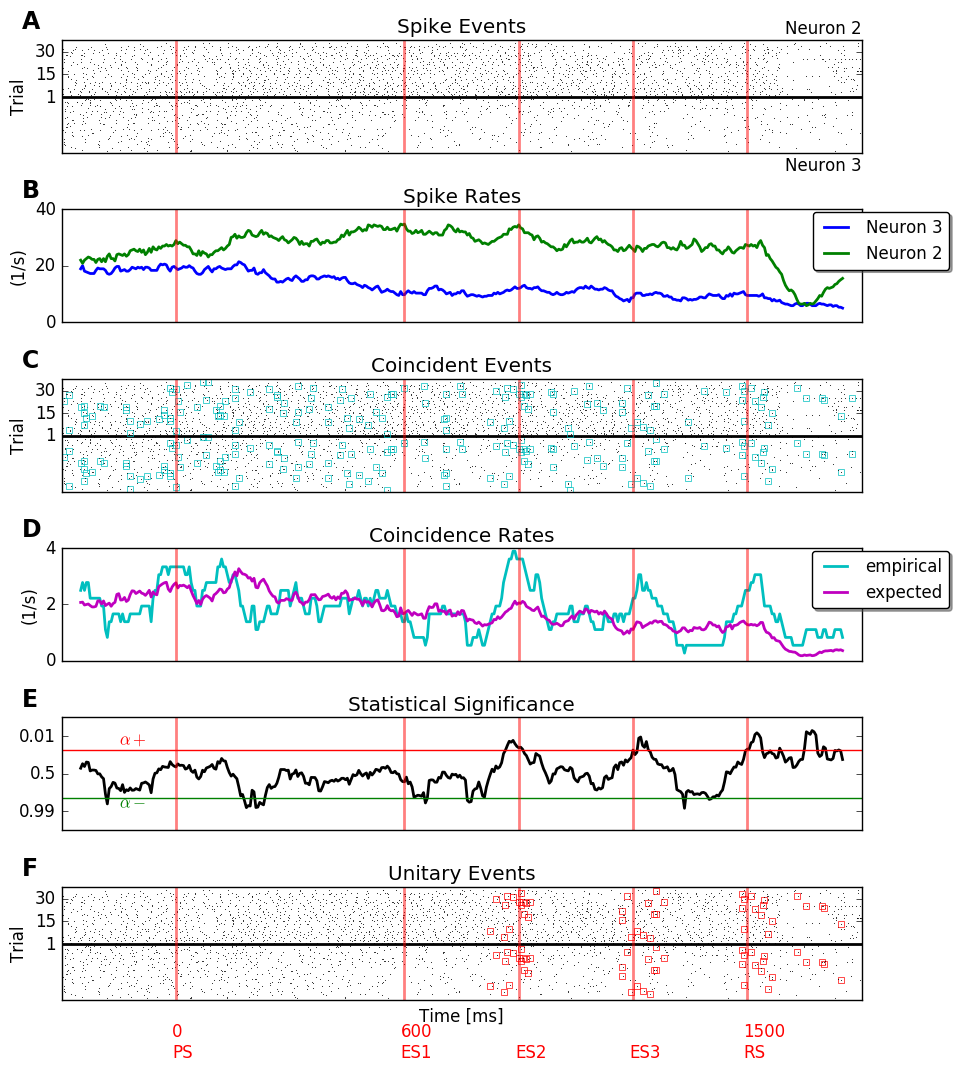

In [4]:
# load and cut the data
file_name = 'winny131_23.gdf'
trigger = 'RS_4'
t_pre = 1799*pq.ms
t_post = 300*pq.ms
spiketrain = load_gdf2Neo(data_path+file_name,trigger, t_pre,t_post)
N = len(spiketrain.T)

# calculating UE ...
UE = ue.jointJ_window_analysis(spiketrain, binsize, winsize, winstep, pattern_hash,method=method)

# parameters for plotting
plot_params = {
    'events':{'0\nPS':[300*pq.ms],'600\nES1':[900*pq.ms],'ES2':[1200*pq.ms],
                     'ES3':[1500*pq.ms],'1500\nRS': [1800*pq.ms]},              
    'path_filename_format':'../article/figure2.eps',                                                                                                                     
    }

print('trigger: ', trigger)
plot_figure1_2(spiketrain,UE,significance_level,binsize,winsize,winstep, pattern_hash,N,plot_params)


## Figure 3

()
plotting Figure 3 ...


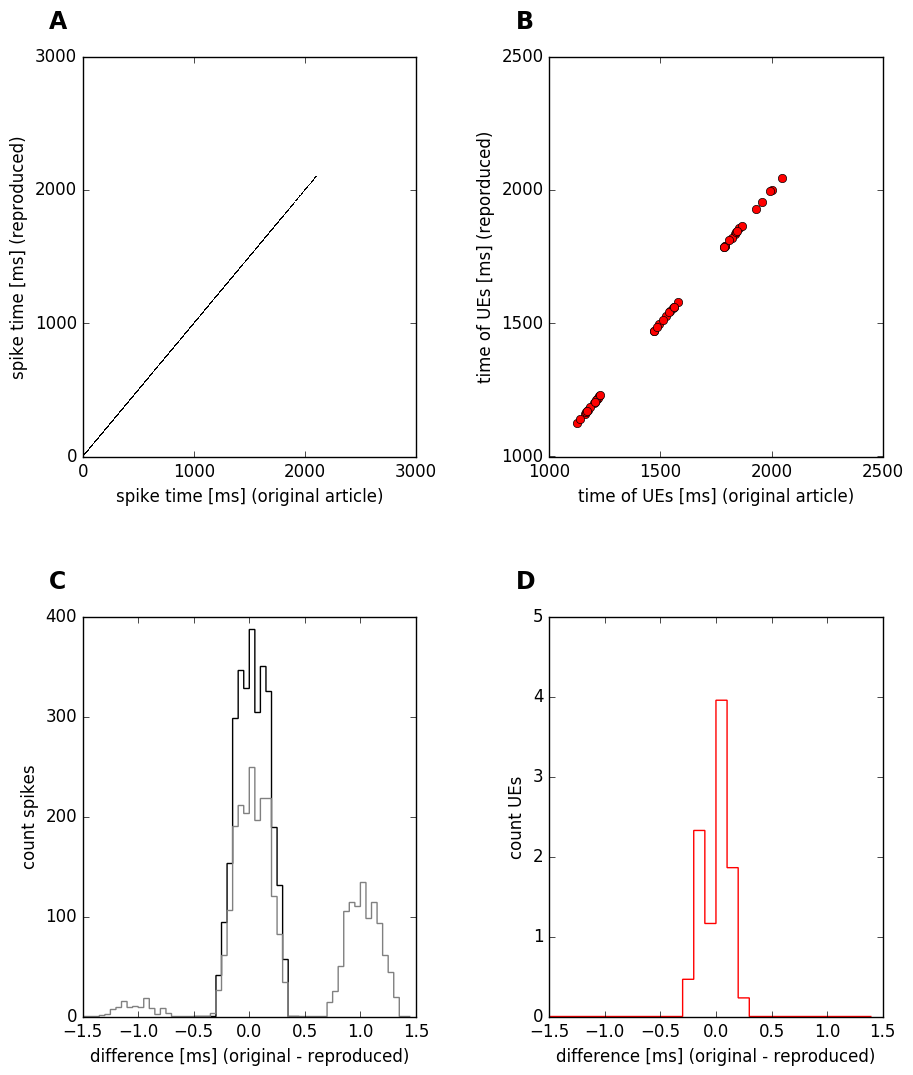

In [5]:
# load spike data of figure 2
file_name = 'winny131_23.gdf'
trigger = 'RS_4'
t_pre = 1799 * pq.ms
t_post = 300 * pq.ms
spiketrain_fig2 = load_gdf2Neo(data_path + file_name, trigger, t_pre, t_post)

# calculating UE ...
UE = ue.jointJ_window_analysis(
    spiketrain_fig2, binsize, winsize, winstep, pattern_hash, method=method)

# load spike data of figure 1
file_name = 'winny131_23.gdf'
trigger = 'PS_4'
t_pre = 300 * pq.ms
t_post = 1800 * pq.ms
spiketrain_fig1 = load_gdf2Neo(data_path + file_name, trigger, t_pre, t_post)

# load extracted data from Riehle et al
extracted_data = numpy.load(
    data_path + 'extracted_data.npy', encoding='latin1').item()

# parameters for plotting
plot_params = {
    'path_filename_format': '../article/figure3.eps'}

print()
print('plotting Figure 3 ...')
plot_figure3([spiketrain_fig2, spiketrain_fig1], UE, extracted_data,
             significance_level, binsize, winsize,
             winstep, plot_params)

## Figure 6 
- This is the reproduction of Figure 4A of the original article

calculating UE ...
calculating UE ...


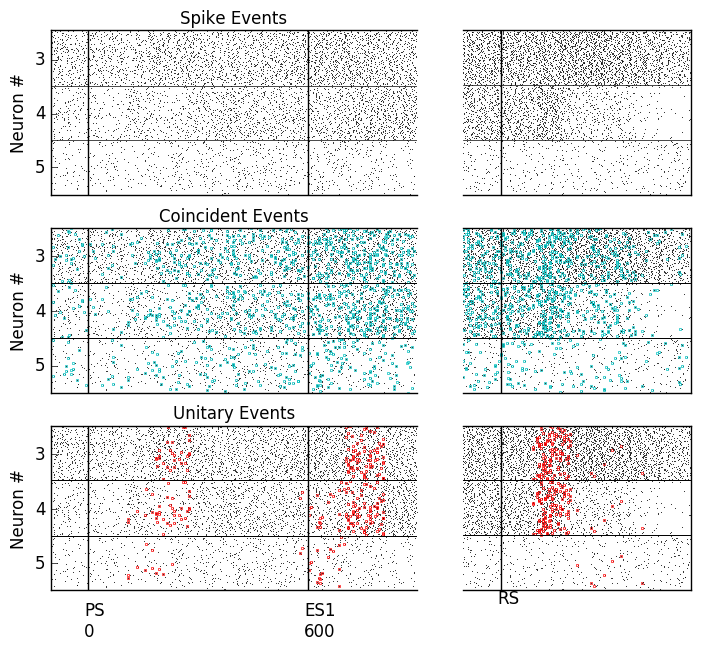

In [6]:
fname = 'jenny201_345_preprocessed.gdf'

trigger = 'ES'
t_pre = 699*pq.ms
t_post = 299*pq.ms
spiketrains1 = load_gdf2Neo(data_path+fname,trigger, t_pre,t_post)
trigger = 'RS'
t_pre = 99*pq.ms
t_post = 499*pq.ms
spiketrains2 = load_gdf2Neo(data_path+fname,trigger, t_pre,t_post)

sts_lst = [spiketrains1, spiketrains2]
Js_dict_lst_lst = []
for spiketrains in sts_lst:
    N = len(spiketrains.T)
    print('calculating UE ...')
    patterns_hash = [7,3,5,6]
    N_comb = [[0,1,2],[0,1,2],[0,1,2],[0,1,2]]
    UE_anal_lst = []
    for n, pattern_hash in zip(N_comb,patterns_hash):
        UE_anal = ue.jointJ_window_analysis(
            spiketrains, binsize, winsize, winstep, [pattern_hash],n_surr = 0,method = method)
        UE_anal_lst.append(UE_anal)
    Js_dict_lst_lst.append(UE_anal_lst)
Js_dict = {
    'events1':{'PS\n0':[100*pq.ms],'ES1\n600':[700*pq.ms]},'events2':{'RS\n':[100*pq.ms]},
    'unit_real_ids': [3,4,5],
    'path_filename_format':'../article/figure6.eps',                                                                                                                         
    'figsize':(8,7),
    'fsize':12,
    'ms':2,
    'hspace':0.2,
    }

plot_figure6(sts_lst,Js_dict_lst_lst,significance_level,binsize,winsize,winstep, patterns_hash,N,N_comb,Js_dict)
